In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import env

### 1. A bank found that the average number of cars waiting during the noon hour at a drive-up window follows a Poisson distribution with a mean of 2 cars. Make a chart of this distribution and answer these questions concerning the probability of cars waiting at the drive-up window.

In [26]:
# What is the probability that no cars drive up in the noon hour?
drive_up = stats.poisson(2)
drive_up.pmf(0)
# 0.135

0.1353352832366127

In [27]:
# What is the probability that 3 or more cars come through the drive through?
drive_up.sf(2)
# 0.323

0.32332358381693654

In [28]:
# How likely is it that the drive through gets at least 1 car?
drive_up.sf(0)
# 0.8647

0.8646647167633873

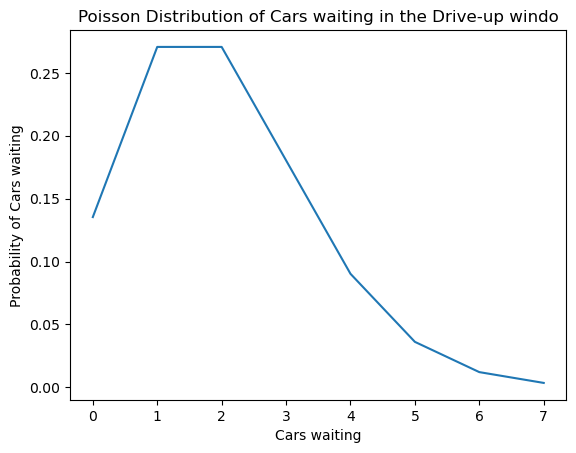

In [29]:
# Chart Distribution

x = np.arange(0,8)
y = [drive_up.pmf(i) for i in x]
plt.plot(x,y)
plt.xlabel('Cars waiting')
plt.ylabel('Probability of Cars waiting')
plt.title('Poisson Distribution of Cars waiting in the Drive-up windo')
plt.show()

### 2. Grades of State University graduates are normally distributed with a mean of 3.0 and a standard deviation of .3. Calculate the following:



In [30]:
# What grade point average is required to be in the top 5% of the graduating class?
gpa = stats.norm(3, .3)
gpa.isf(1/20)
# 3.49

3.4934560880854417

In [31]:
# What GPA constitutes the bottom 15% of the class?
gpa.ppf(.15)
# 2.69

2.689069983151863

In [114]:
# An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class. Determine the range of the third decile. Would a student with a 2.8 grade point average qualify for this scholarship?
my_gpa = 2.8
third_decile_range = (gpa.ppf(.2), gpa.ppf(.3))
lower, upper = third_decile_range
lower < my_gpa < upper
# A student with a 2.8 gpa would qualify for this scholarship

True

In [33]:
# If I have a GPA of 3.5, what percentile am I in?
gpa.cdf(3.5)
# 95th percentile

0.9522096477271853

### 3. A marketing website has an average click-through rate of 2%. One day they observe 4326 visitors and 97 click-throughs. How likely is it that this many people or more click through?



In [34]:
# Create scipy object for binomial distribution
click = stats.binom(4326, .02)
# Survival function for 97 or more click-throughs
click.sf(96)
# 0.1398

0.13975823631416448

### 4. You are working on some statistics homework consisting of 100 questions where all of the answers are a probability rounded to the hundreths place. Looking to save time, you put down random probabilities as the answer to each question.



In [35]:
# What is the probability that at least one of your first 60 answers is correct?

# Create scipy object for binomial distribution: There is a .01 chance of success for every trial
homework = stats.binom(60, .01)
homework.sf(0)
# 0.45

0.45284335760923855

### 5. The codeup staff tends to get upset when the student break area is not cleaned up. Suppose that there's a 3% chance that any one student cleans the break area when they visit it, and, on any given day, about 90% of the 3 active cohorts of 22 students visit the break area. How likely is it that the break area gets cleaned up each day? How likely is it that it goes two days without getting cleaned up? All week?



In [36]:
# Create scipy object for binomial distribution
clean = stats.binom(59, .03)

In [37]:
# How likely is it that the break area gets cleaned up each day?
clean.sf(0)
# 0.83

0.8342199288437352

In [109]:
# How likely is it that it goes two days without getting cleaned up?

# Create new scicpy object for 2 days of trials. 59 * 2
cleantwo = stats.binom(118, .03)
cleantwo.cdf(0)
# 0.027

0.02748303199257622

In [116]:
# All week?

# Create new scipy object for 5 days of trials. .9 * 3 * 22 * 5
cleanweek = stats.binom(297, .03)
cleanweek.cdf(0)
# 0.0001

0.00011781621791055144

### 6. You want to get lunch at La Panaderia, but notice that the line is usually very long at lunchtime. After several weeks of careful observation, you notice that the average number of people in line when your lunch break starts is normally distributed with a mean of 15 and standard deviation of 3. If it takes 2 minutes for each person to order, and 10 minutes from ordering to getting your food, what is the likelihood that you have at least 15 minutes left to eat your food before you have to go back to class? Assume you have one hour for lunch, and ignore travel time to and from La Panaderia.



In [127]:
# ANSWER: 0.69
panaderia_dist = stats.norm((15*2), (3*2))

lunch_break = 60
time_waiting = 10
time_ordering = 2
time_bank = lunch_break - time_waiting - time_ordering

time_bank = time_bank - 15

panaderia_dist.cdf(time_bank)

0.6914624612740131

### 7. Connect to the employees database and find the average salary of current employees, along with the standard deviation. For the following questions, calculate the answer based on modeling the employees salaries with a normal distribution defined by the calculated mean and standard deviation then compare this answer to the actual values present in the salaries dataset.



In [137]:
# Connect to employees database and pull info from the salaries table
url = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/employees'

query = 'select * from salaries s where s.to_date > NOW()'
salaries = pd.read_sql(query, url)

In [138]:
sal_stats = salaries.salary.agg(['std', 'mean'])
sal_distribution = stats.norm(sal_stats['mean'], sal_stats['std'])


In [141]:
# a. What percent of employees earn less than 60,000?
sal_distribution.cdf(60_000)

0.24385742480214434

In [142]:
(salaries.salary < 60_000).sum() / len(salaries.salary)

0.2705727041028802

In [143]:
# b. What percent of employees earn more than 95,000?
sal_distribution.sf(95_000)

0.09208819199804058

In [144]:
(salaries.salary > 90_000).sum() / len(salaries.salary)

0.15591111259182755

In [145]:
# c. What percent of employees earn between 65,000 and 80,000?
low, high = sal_distribution.cdf([65_000, 80_000])
high - low

0.33506056854466654

In [146]:
((salaries.salary > 65_000) & (salaries.salary < 80_000)).sum() / len(salaries.salary)

0.325107028035515

In [147]:
# d. What do the top 5% of employees make?
sal_distribution.isf(0.05)

# 91616.71

100484.64454102777